In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

name = []
price = []
description = []

headers = {
    'User-Agent': (
        'Mozilla/5.0 (Windows NT 10.0; Win64; x64) '
        'AppleWebKit/537.36 (KHTML, like Gecko) '
        'Chrome/120.0.0.0 Safari/537.36'
    )
}

for i in range(1, 11):
    url = 'https://www.flipkart.com/search?q=watches+under+100000&page={}'.format(i)
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'lxml')
    
    Container = soup.find('div', class_='DOjaWF gdgoEp')
    if Container:
        Watch = Container.find_all('div', class_='_1sdMkc LFEi7Z')
        
        for j in Watch:
            n = j.find('div', class_='syl9yP')
            p = j.find('div', class_='Nx9bqj')
            d = j.find('a', class_='WKTcLC')
            
            name.append(n.text.strip() if n else None)
            price.append(p.text.strip() if p else None)
            description.append(d.text.strip() if d else None)
    else:
        print(f"Container not found on page {i}")

data = pd.DataFrame({
    'name': name,
    'price': price,
    'description': description
})

data = data.reset_index(drop=True)
data

,name,price,description
0,SIGNATIZE,"₹17,399","Wrist Watches, Large Dial Gold Steel Strap Qua..."
1,Mathey-Tissot,"₹29,029",Swiss Made Lagoon Chronograph Quartz Black Dia...
2,FOSSIL,"₹4,539",Briggs Analog Watch - For Men CH2927I
3,A/X ARMANI EXCHANGE,"₹9,339",Hampton Analog Watch - For Men AX2122
4,Mathey-Tissot,"₹12,089",Swiss Made Quartz Blue Dial Analog Watch - Fo...
...,...,...,...
395,Earnshaw,"₹23,974",Holborn _( Skeleton Automatic) Analog Watch -...
396,Mathey-Tissot,"₹15,759",Swiss Made Black Dial Analog Watch - For Men ...
397,PROVOGUE,₹449,Original Gold Plated Day and Date Functioning ...
398,Mathey-Tissot,"₹13,239",Mathy Iii Roman Swiss Made Silver Dial Analog ...


In [2]:
data.head(5)

,name,price,description
0,SIGNATIZE,"₹17,399","Wrist Watches, Large Dial Gold Steel Strap Qua..."
1,Mathey-Tissot,"₹29,029",Swiss Made Lagoon Chronograph Quartz Black Dia...
2,FOSSIL,"₹4,539",Briggs Analog Watch - For Men CH2927I
3,A/X ARMANI EXCHANGE,"₹9,339",Hampton Analog Watch - For Men AX2122
4,Mathey-Tissot,"₹12,089",Swiss Made Quartz Blue Dial Analog Watch - Fo...


In [3]:
data.to_csv("Flipkart_WebScraping.csv",index=False)

In [4]:
data.shape

(400, 3)

In [5]:
data['name'].count()

np.int64(400)

In [6]:
data['price'].count()

np.int64(400)

In [7]:
data['description'].count()

np.int64(400)

In [8]:
# Transformation on Price column for plotting

data['new_Price'] = data['price'].str.replace('[₹,]', '' , regex=True).astype(float)
data.head(5)

,name,price,description,new_Price
0,SIGNATIZE,"₹17,399","Wrist Watches, Large Dial Gold Steel Strap Qua...",17399.0
1,Mathey-Tissot,"₹29,029",Swiss Made Lagoon Chronograph Quartz Black Dia...,29029.0
2,FOSSIL,"₹4,539",Briggs Analog Watch - For Men CH2927I,4539.0
3,A/X ARMANI EXCHANGE,"₹9,339",Hampton Analog Watch - For Men AX2122,9339.0
4,Mathey-Tissot,"₹12,089",Swiss Made Quartz Blue Dial Analog Watch - Fo...,12089.0


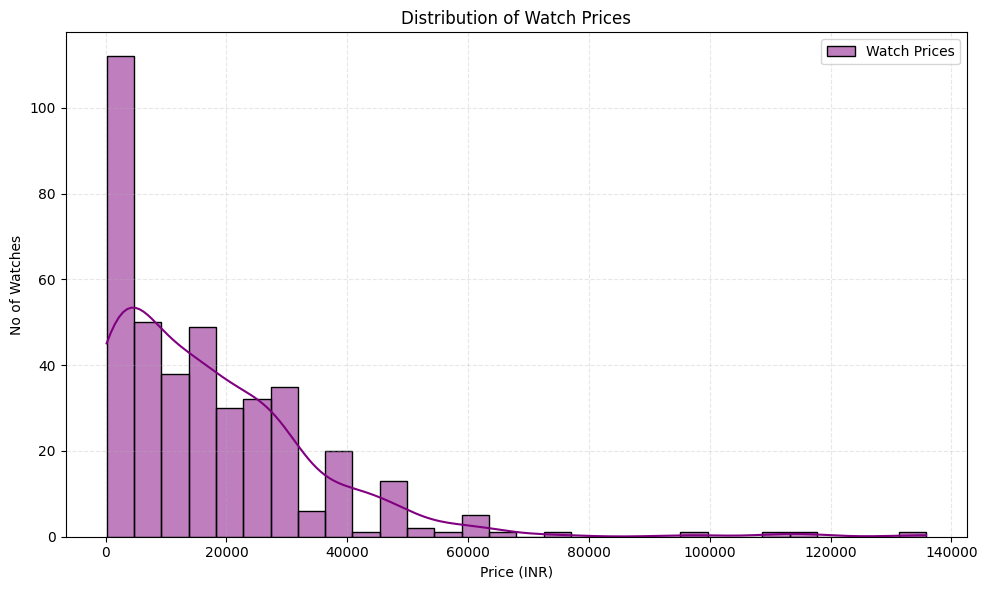

In [9]:
# Using seaborn for plotting as it is made on top of matplotlib and gives more clearer plots
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.histplot(
    data['new_Price'],bins=30,kde=True,color='purple',label='Watch Prices'     
)
plt.title('Distribution of Watch Prices')
plt.xlabel('Price (INR)')
plt.ylabel('No of Watches')
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


In [10]:
# top 10 most expensive watches

top10_expensive_watches = data.sort_values(by='new_Price',ascending=False).head(10)
top10_expensive_watches


,name,price,description,new_Price
158,Mathey-Tissot,"₹1,35,800",Chronograph Automatic Swiss Made White Dial An...,135800.0
84,Mathey-Tissot,"₹1,14,969",Chronograph Automatic Swiss Made Black Dial An...,114969.0
34,Victorinox,"₹1,12,670",Journey 1884 Automatic Analog Watch - For Men...,112670.0
58,Victorinox,"₹96,710",I.N.O.X. Automatic Analog Watch - For Men 242...,96710.0
111,Mathey-Tissot,"₹74,000",Swiss Made Edmond Automatic Blue Dial Analog W...,74000.0
365,Victorinox,"₹65,455",DIVE PRO QUARTZ Analog Watch - For Men 241990,65455.0
329,Mathey-Tissot,"₹60,830",Swiss Made Edmond G10 Chronograph Quartz White...,60830.0
129,Mathey-Tissot,"₹60,830",Swiss Made Edmond G10 Chronograph Quartz White...,60830.0
322,Victorinox,"₹60,610",Chronograph Analog Watch - For Men 241946,60610.0
104,Mathey-Tissot,"₹59,150",Swiss Made Edmond 5040F Chronograph Quartz Bla...,59150.0


C:\Users\Nikita Gupta\AppData\Local\Temp\ipykernel_21800\3399853951.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


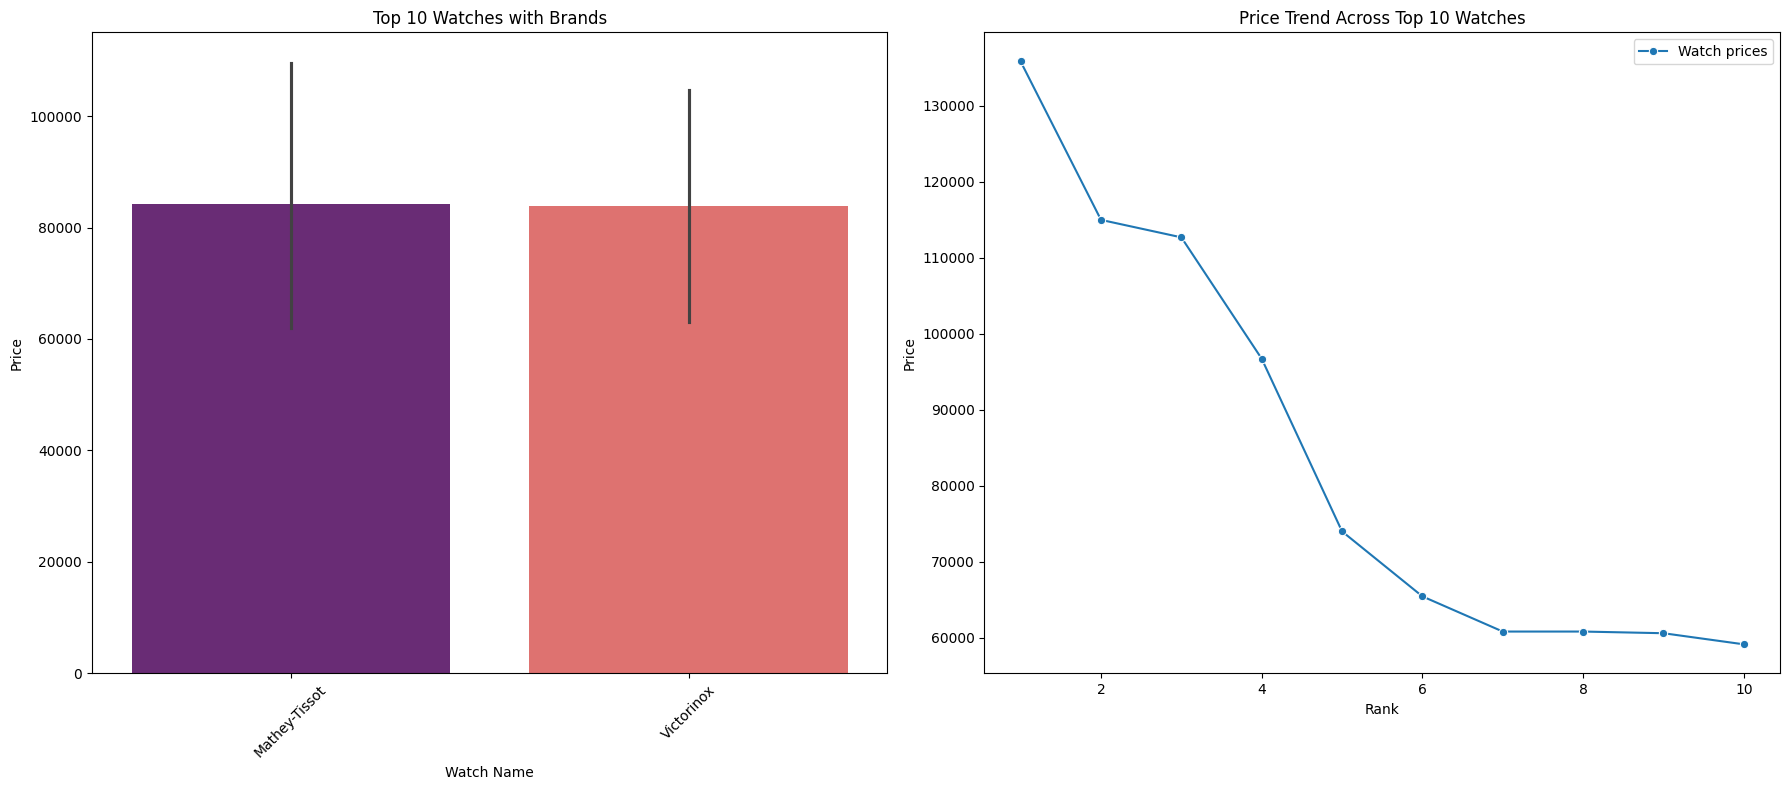

In [11]:
# Plotting subgraphs as top 10 watches have duplicate brand names so the first graph refers the brand name and price distribution and the other one is showing the exact top 10 prices for all the watches , irrespective of duplicates
fig, axes = plt.subplots(1, 2, figsize=(18,8))

sns.barplot(
    ax=axes[0],
    x='name',
    y='new_Price',
    data=top10_expensive_watches,
    palette='magma',
)
axes[0].set_title('Top 10 Watches with Brands')
axes[0].set_xlabel('Watch Name')
axes[0].set_ylabel('Price')
axes[0].tick_params(axis='x', rotation=45)


sns.lineplot(
    ax=axes[1],
    x=range(1, len(top10_expensive_watches)+1),
    y=top10_expensive_watches['new_Price'],
    marker='o',
    label ='Watch prices'
)
axes[1].set_title('Price Trend Across Top 10 Watches')
axes[1].set_xlabel('Rank')
axes[1].set_ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()


In [12]:
# Calculating price variation for brands having number of products more than or equal to 10
top10_names =data['name'].value_counts().head(10).index.tolist() # since want only watch names hence uses index and then converted into list
filtered = data[data['name'].isin(top10_names)]
filtered


,name,price,description,new_Price
0,SIGNATIZE,"₹17,399","Wrist Watches, Large Dial Gold Steel Strap Qua...",17399.0
1,Mathey-Tissot,"₹29,029",Swiss Made Lagoon Chronograph Quartz Black Dia...,29029.0
4,Mathey-Tissot,"₹12,089",Swiss Made Quartz Blue Dial Analog Watch - Fo...,12089.0
5,Seiko,"₹40,500",5 Sports GMT Analog Watch - For Men SSK035K1,40500.0
6,Titan,"₹22,235",Titan Ceramic Fusion Analog Watch - For Men N...,22235.0
...,...,...,...,...
395,Earnshaw,"₹23,974",Holborn _( Skeleton Automatic) Analog Watch -...,23974.0
396,Mathey-Tissot,"₹15,759",Swiss Made Black Dial Analog Watch - For Men ...,15759.0
397,PROVOGUE,₹449,Original Gold Plated Day and Date Functioning ...,449.0
398,Mathey-Tissot,"₹13,239",Mathy Iii Roman Swiss Made Silver Dial Analog ...,13239.0


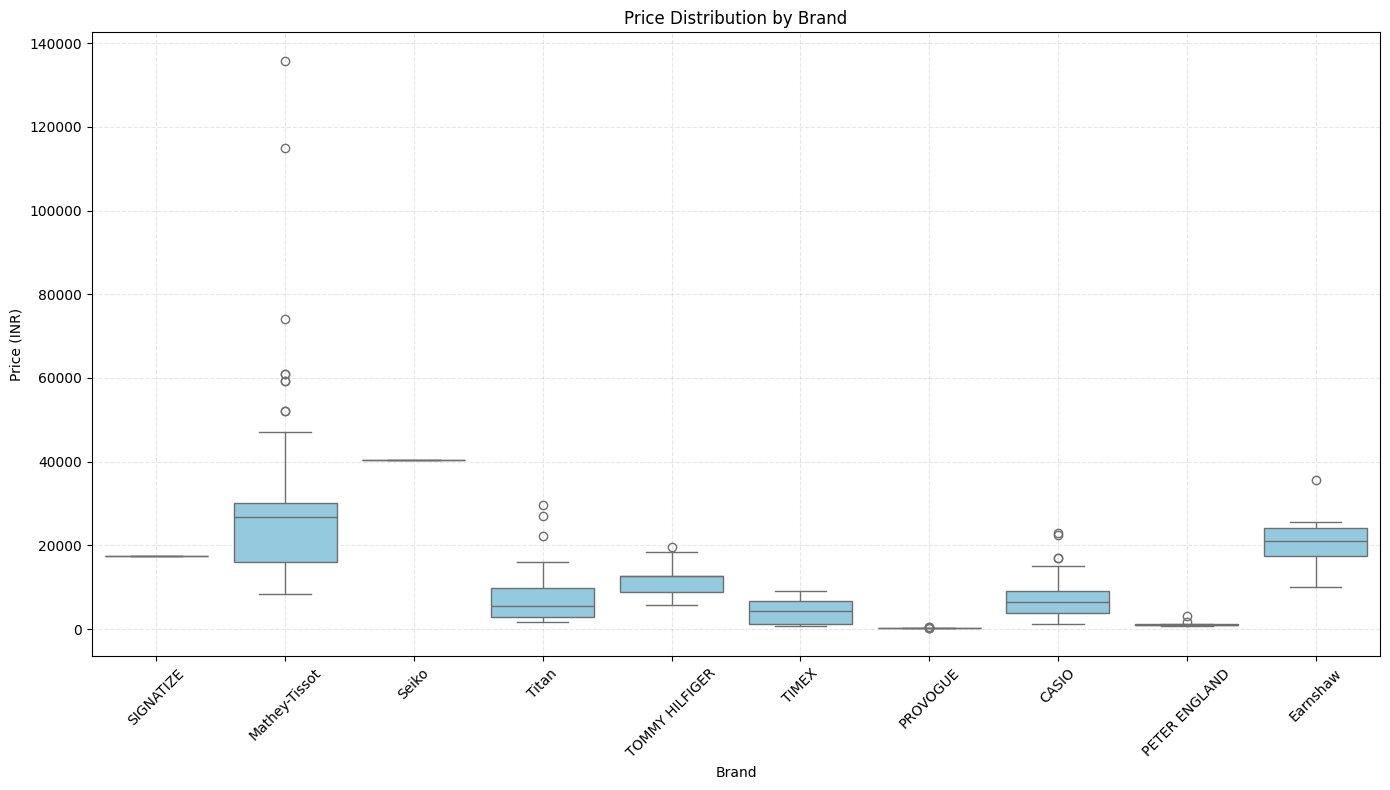

In [13]:
plt.figure(figsize=(14,8))
sns.boxplot(x='name', y='new_Price', data=filtered , color='skyblue')
plt.tick_params(axis='x', rotation=45)
plt.title('Price Distribution by Brand')
plt.xlabel('Brand')
plt.ylabel('Price (INR)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


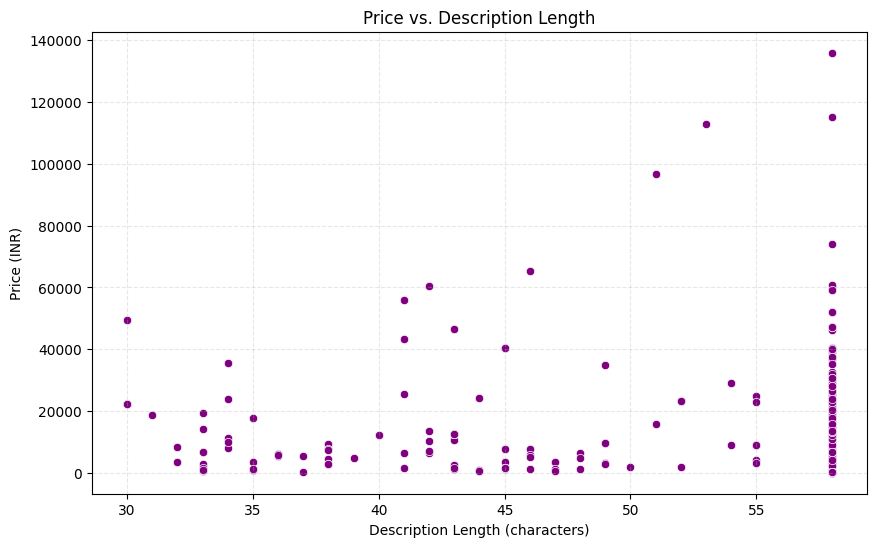

In [14]:
# Scatter plot to check to wheather for long description prices also goes higher for watches

data['desc_len'] = data['description'].str.len()

plt.figure(figsize=(10,6))
sns.scatterplot(x='desc_len', y='new_Price', data=data , color="purple")
plt.title('Price vs. Description Length')
plt.xlabel('Description Length (characters)')
plt.ylabel('Price (INR)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()
